**Importing the datasets**

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as np
import tensorflow as tf

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


In [24]:
minst = tf.keras.datasets.mnist
(X_train, _),(X_test, _)= minst.load_data()
X_train,X_val = X_train[:-10000],X_train[-10000]

X_train = X_train.astype('float32') /255.
X_test = X_test.astype('float32') /255.
X_val = X_val.astype('float32') /255.

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(50000, 28, 28)
(10000, 28, 28)
(28, 28)


Visulaising the dataset images

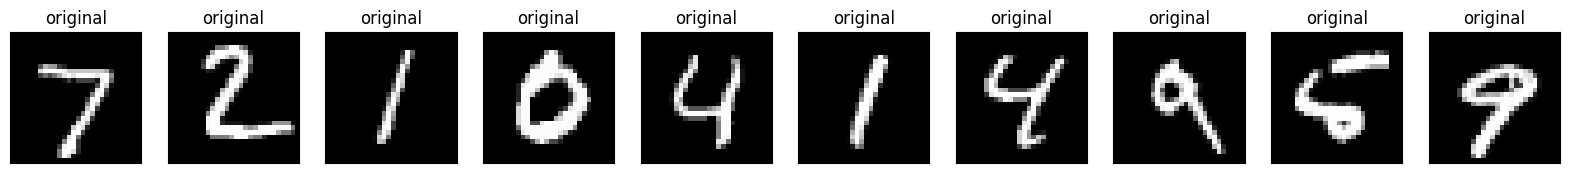

In [25]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #Display Original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [51]:
latent_dim =64

class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation ='relu')
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784,activation='sigmoid'),
        layers.Reshape((28,28))
         ])
  def call(self,X):
      encoded = self.encoder(X)
      decoder =self.decoder(encoded)
      return decoder

autoencoder = Autoencoder(latent_dim)

Define Auto Enocder Class

In [52]:
autoencoder.compile(optimizer = 'adam', loss = 'MeanAbsoluteError')

In [40]:
autoencoder.fit(X_train,X_train,
                epochs= 25 ,
                shuffle =True,
                validation_data = (X_test,X_test))





Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 0.0972 - val_loss: 0.0773
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0705 - val_loss: 0.0661
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0649 - val_loss: 0.0641
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0637 - val_loss: 0.0633
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0631 - val_loss: 0.0629
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0628 - val_loss: 0.0627
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0626 - val_loss: 0.0625
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0621 - val_loss: 0.0620
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0618 - val_loss: 0.0616
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.061

AttributeError: 'Autoencoder' object has no attribute 'self'

In [41]:
encoded_img = autoencoder.encoder(X_test).numpy()
decoded_img = autoencoder.decoder(encoded_img).numpy()

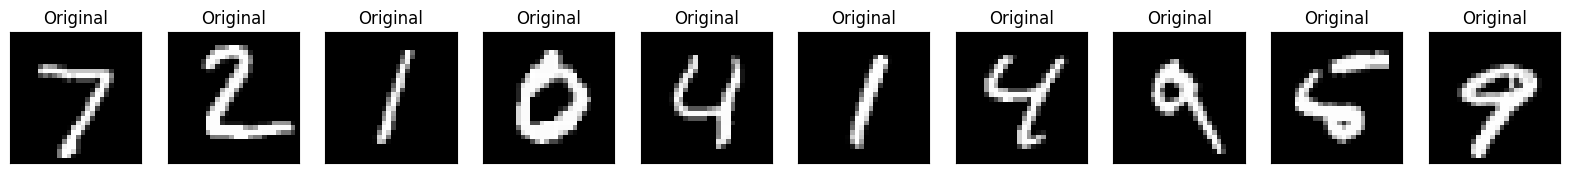

In [43]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

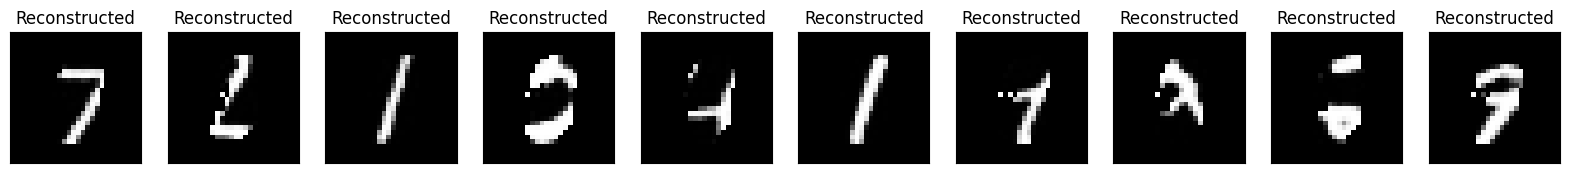

In [47]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_img[i], cmap='gray')
  plt.title("Reconstructed")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)